In [1]:
from Utils.model_classes import *
from Utils.processing_data_func import *

import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import scikitplot as skplt
import matplotlib.pyplot as plt

In [2]:
gpu = tf.config.experimental.list_physical_devices('GPU')[0]
tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
split = "5"

In [4]:
t, s = load_processed("dataset/splitedData/3c_BERT_processed_Data/"+split+"percent/Total_fix", \
               "dataset/splitedData/3c_BERT_processed_Data/"+split+"percent/Split_fix", split=True)
Xtrain, ytrain, Xdev, ydev, Xtest, ytest = t
X_train, y_train, X_unl, y_unl = s

In [5]:
BERT_checkpoint_filepath = '../ECAI/model/'+split+'percent_3c_CLS_aBERT_Best_EMRS_model_f1_Mini'
SSGB_checkpoint_filepath = './model/T128_'+split+'percent_beta1_05'
path_bert_model = './BERT-models/BERT-Mini'
if len(split)==1: split = '0'+split

## SSGAN-BERT RESULTS

In [6]:
SSGB_model = SSGAN_BERT(path_bert_model=path_bert_model, split_data=s)
SSGB_model.load_models(SSGB_checkpoint_filepath)

loader: No value for:[bert/encoder/layer_0/attention/output/adapter-down/kernel:0], i.e.:[bert/encoder/layer_0/attention/output/adapter-down/kernel] in:[./BERT-models/BERT-Mini/bert_model.ckpt]
loader: No value for:[bert/encoder/layer_0/attention/output/adapter-down/bias:0], i.e.:[bert/encoder/layer_0/attention/output/adapter-down/bias] in:[./BERT-models/BERT-Mini/bert_model.ckpt]
loader: No value for:[bert/encoder/layer_0/attention/output/adapter-up/kernel:0], i.e.:[bert/encoder/layer_0/attention/output/adapter-up/kernel] in:[./BERT-models/BERT-Mini/bert_model.ckpt]
loader: No value for:[bert/encoder/layer_0/attention/output/adapter-up/bias:0], i.e.:[bert/encoder/layer_0/attention/output/adapter-up/bias] in:[./BERT-models/BERT-Mini/bert_model.ckpt]
loader: No value for:[bert/encoder/layer_0/output/adapter-down/kernel:0], i.e.:[bert/encoder/layer_0/output/adapter-down/kernel] in:[./BERT-models/BERT-Mini/bert_model.ckpt]
loader: No value for:[bert/encoder/layer_0/output/adapter-down/bia

In [7]:
y_pred = SSGB_model.D_Model.predict(Xtest)
y_test = ytest.argmax(axis=1)
result = y_pred[0][:,1:].argmax(axis=1)
print(classification_report(y_test, result, digits=4))

              precision    recall  f1-score   support

           0     0.6888    0.6163    0.6505     13497
           1     0.2291    0.2259    0.2275      4829
           2     0.8373    0.8725    0.8545     35440

    accuracy                         0.7501     53766
   macro avg     0.5851    0.5716    0.5775     53766
weighted avg     0.7454    0.7501    0.7470     53766



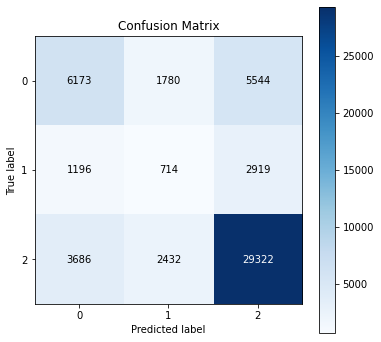

In [9]:
fig = skplt.metrics.plot_confusion_matrix(y_test, result, normalize=False, figsize=(6,6))
fig.figure.savefig('./Confusion_Matrix_Plot/SSGB_'+split+'.eps', bbox_inches='tight')

## BERT RESULTS

In [8]:
BERT_model = keras.models.load_model(BERT_checkpoint_filepath, custom_objects={'F1Score': tfa.metrics.F1Score(num_classes=3, average='macro')})

In [9]:
y_pred_ = BERT_model.predict(Xtest).argmax(axis=-1)
print(classification_report(y_test, y_pred_, digits=4))

              precision    recall  f1-score   support

           0     0.6298    0.6496    0.6396     13497
           1     0.2287    0.1597    0.1880      4829
           2     0.8340    0.8583    0.8460     35440

    accuracy                         0.7432     53766
   macro avg     0.5642    0.5559    0.5579     53766
weighted avg     0.7284    0.7432    0.7351     53766



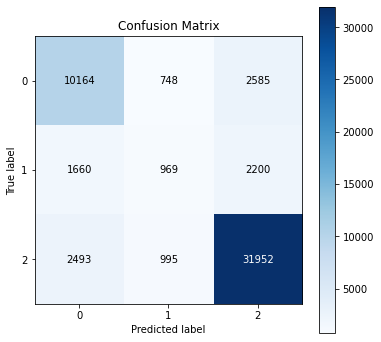

In [11]:
fig = skplt.metrics.plot_confusion_matrix(y_test, y_pred_, normalize=False, figsize=(6,6))
fig.figure.savefig('./Confusion_Matrix_Plot/BERT_'+split+'.eps', bbox_inches='tight')